<center> <h2> DS Independent Study - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3> User Review Analysis for Recommendation Prediction</h3> </center>
<center><h4>Katherine Ricaurte</h4></center>

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>MODEL</a>
4. <a href='#4'>RESULTS</a>

<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION


**Problem Statement**

In this project, I will work to build a model that predicts whether a user recommended a specific VR game based on the sentiment of their review. 


**Significance of the Problem**

There has been a lot of studies done on the Video Game industry. However, the VR game market in specific is one that has recently acquired more momentum. My contribution to this research includes a dataset of user reviews and recommendations, a sentiment analysis, and visualizations of the data exploration. Analyzing this data will provide insight into the needs and wants of consumers in the VR game Market. This will be a powerful tool for companies to use as they continue to create and market new games.  





## 2. METHOD

### **2.1 Steam API**

* I obtained this data through the Steam WebAPI.
* The dataset includes a game's app id, user reviews, whether they recommended a game or not, the recommendation id, and the overall sentiment of the review as seen by Steam ((very)positive, mixed, (very)negative. 

### **2.2. Feature and Target Variables**




### **2.3. Data Analysis**

**A Supervised Learning Problem** 

This is a supervised ML problem because I am using well-labeled data: I are taking the features of individual user reviews and attempting to predict whether the user recommended a specific VR game or not. The application of this model is to hopefully be able to predict the most valued features of games that may not be released yet.
* The target variable is the recommendation, which is a boolean of either 1: recommended or 0: did not recommend. The feature variables are the bag of words(tokens) derived from the user reviews.

**Predictive Model**

* I will be using classification models because I want to predict a user's recommendation(target variable) based on the sentiment of their review(feature variable).
**ML Algorithms I anticipate using: Logistic Regression, Naive Bayes Classifier, Decision Tree Classifier**

    * Logistic Regression: 
    * Naive Bayes: 
    * Decision Tree: 

## 3. MODEL

### **3.1 Data Wrangling**

### **Loading and Cleaning the Data**


In [2]:
# loading the VR game list from Top Sellers page on Steam
import pandas as pd

games_df = pd.read_csv('/Users/katherinericaurte/Desktop/Steam Project/vr_titles.csv', index_col = "Software Title")

In [3]:
games_df

,AppID
Software Title,
EVE: Valkyrie,688480
Albino Lullaby: Episode 1,355860
Tabletop Simulator,286160
Zero Caliber VR,877200
Unseen Diplomacy,429830
...,...
Electronauts - VR Music,691160
GNOG,290510
Serious Sam Fusion 2017,564310


In [7]:
# extract positive reviews
import requests
from tqdm import tqdm
from pandas import DataFrame
    
    
appid_lst = games_df['AppID'].tolist()

positive_reviews = [ ]

for i in tqdm(range(len(appid_lst))):     

    response = requests.get('http://store.steampowered.com/appreviews/{}'.format(appid_lst[i]), 
                            params={"json": 1, "num_per_page":100, "language": "english"}).json()


    if i == 23:
        continue
    
    for n in range(len(response)):
        
        rev_type = response["query_summary"]["review_score_desc"]
        game_id = appid_lst[n]
        for review_data in response["reviews"]:
            #print(review_data)
            review_row = (
                review_data["recommendationid"],
                review_data["review"],
                review_data["voted_up"],
                game_id,
                rev_type
            )
            positive_reviews.append(review_row)
        
 
print(f"Parsed {len(positive_reviews)} reviews, turning into a dataframe")        

100%|██████████| 71/71 [00:40<00:00,  1.74it/s]

Parsed 5176 reviews, turning into a dataframe


In [8]:
# putting all positive reviews into a dataframe
df = pd.DataFrame.from_records(positive_reviews)
df

,0,1,2,3,4
0,78512918,DONT BUY\n\ndiscontinued service for the game....,False,688480,Mixed
1,76993388,When this game first released without the Warz...,True,688480,Mixed
2,78512918,DONT BUY\n\ndiscontinued service for the game....,False,355860,Mixed
3,76993388,When this game first released without the Warz...,True,355860,Mixed
4,78512918,DONT BUY\n\ndiscontinued service for the game....,False,286160,Mixed
...,...,...,...,...,...
5171,81481614,This game might have been innovative when it w...,False,877200,Very Positive
5172,79424490,"Way too expensive for a 3 hour story game, If ...",False,877200,Very Positive
5173,82220932,Fun and light zombie apocalypse game. I finish...,True,877200,Very Positive
5174,82139361,"its a short simple game, walk, point and shoot...",True,877200,Very Positive


In [9]:
# formatting positive reviews dataframe columns
df = df.rename(columns = {0:"recommendation_id", 1:"review", 2:"recommendation", 3:"App_ID", 4:"review_type"}).drop_duplicates(subset=['review'])
df

,recommendation_id,review,recommendation,App_ID,review_type
0,78512918,DONT BUY\n\ndiscontinued service for the game....,False,688480,Mixed
1,76993388,When this game first released without the Warz...,True,688480,Mixed
8,23032046,ATTN newcomers: THIS is why early purchasers a...,False,688480,Mostly Positive
9,18131287,A sublime mix of influences seeming to compris...,True,688480,Mostly Positive
10,18472445,After the RIDICULOUS amount of indies horror g...,True,688480,Mostly Positive
...,...,...,...,...,...
5153,81481614,This game might have been innovative when it w...,False,688480,Very Positive
5154,79424490,"Way too expensive for a 3 hour story game, If ...",False,688480,Very Positive
5155,82220932,Fun and light zombie apocalypse game. I finish...,True,688480,Very Positive
5156,82139361,"its a short simple game, walk, point and shoot...",True,688480,Very Positive


In [10]:
# check the distribution of positive reviews
df.groupby('review_type').count()

,recommendation_id,review,recommendation,App_ID
review_type,,,,
Mixed,6,6,6,6
Mostly Positive,107,107,107,107
Overwhelmingly Positive,546,546,546,546
Positive,1,1,1,1
Very Positive,606,606,606,606


In [12]:
# getting negative only reviews    
    
appid_lst = games_df['AppID'].tolist()

neg_reviews = [ ]

for i in tqdm(range(len(appid_lst))):     

    response2 = requests.get('http://store.steampowered.com/appreviews/{}'.format(appid_lst[i]), 
                            params={"json": 1, "num_per_page":100, "language": "english", "review_type": "negative"}).json()


    if i == 23:
        continue
    
    for n in range(len(response2)):
        
        game_id = appid_lst[n]
        for review_data in response2["reviews"]:
            #print(review_data)
            review_row = (
                review_data["recommendationid"],
                review_data["review"],
                review_data["voted_up"],
                game_id,
              
            )
            neg_reviews.append(review_row)
        
 
print(f"Parsed {len(neg_reviews)} negative reviews, turning into a dataframe")


100%|██████████| 71/71 [01:09<00:00,  1.02it/s]

Parsed 5448 negative reviews, turning into a dataframe


In [13]:
# putting all positive reviews into a dataframe
df2 = pd.DataFrame.from_records(neg_reviews)
df2

,0,1,2,3
0,78512918,DONT BUY\n\ndiscontinued service for the game....,False,688480
1,78512918,DONT BUY\n\ndiscontinued service for the game....,False,355860
2,78512918,DONT BUY\n\ndiscontinued service for the game....,False,286160
3,78512918,DONT BUY\n\ndiscontinued service for the game....,False,877200
4,23032046,ATTN newcomers: THIS is why early purchasers a...,False,688480
...,...,...,...,...
5443,79424490,"Way too expensive for a 3 hour story game, If ...",False,355860
5444,81481614,This game might have been innovative when it w...,False,286160
5445,79424490,"Way too expensive for a 3 hour story game, If ...",False,286160
5446,81481614,This game might have been innovative when it w...,False,877200


In [14]:
# formatting negative reviews dataframe columns
df2 = df2.rename(columns = {0:"recommendation_id", 1:"review", 2:"recommendation", 3:"AppID"}).drop_duplicates(subset=['review'])
df2

,recommendation_id,review,recommendation,AppID
0,78512918,DONT BUY\n\ndiscontinued service for the game....,False,688480
4,23032046,ATTN newcomers: THIS is why early purchasers a...,False,688480
5,22321501,"This game may very well be good, and I may ver...",False,688480
6,50336812,I bought this game after watching a video of J...,False,688480
7,67503544,"Weird and wonderful, with an intriguing story,...",False,688480
...,...,...,...,...
5428,76892570,"Unfortunately, it's yet another game in never-...",False,688480
5429,77005343,Playing the game with a coop friend split scre...,False,688480
5436,80929549,This is a great remaster and everything you co...,False,688480
5440,81481614,This game might have been innovative when it w...,False,688480


 **Merging all reviews**

In [16]:
# Joining the two dataframes 
import pandas as pd
all_reviews = pd.concat([df,df2], axis=0).drop(columns="AppID")
all_reviews

,recommendation_id,review,recommendation,App_ID,review_type
0,78512918,DONT BUY\n\ndiscontinued service for the game....,False,688480.0,Mixed
1,76993388,When this game first released without the Warz...,True,688480.0,Mixed
8,23032046,ATTN newcomers: THIS is why early purchasers a...,False,688480.0,Mostly Positive
9,18131287,A sublime mix of influences seeming to compris...,True,688480.0,Mostly Positive
10,18472445,After the RIDICULOUS amount of indies horror g...,True,688480.0,Mostly Positive
...,...,...,...,...,...
5428,76892570,"Unfortunately, it's yet another game in never-...",False,NaN,NaN
5429,77005343,Playing the game with a coop friend split scre...,False,NaN,NaN
5436,80929549,This is a great remaster and everything you co...,False,NaN,NaN
5440,81481614,This game might have been innovative when it w...,False,NaN,NaN


In [18]:
# Converting the recommendation boolean values to integers - False:0, True:1
all_reviews['recommendation'] = all_reviews['recommendation'].astype(int)
all_reviews

,recommendation_id,review,recommendation,App_ID,review_type
0,78512918,DONT BUY\n\ndiscontinued service for the game....,0,688480.0,Mixed
1,76993388,When this game first released without the Warz...,1,688480.0,Mixed
8,23032046,ATTN newcomers: THIS is why early purchasers a...,0,688480.0,Mostly Positive
9,18131287,A sublime mix of influences seeming to compris...,1,688480.0,Mostly Positive
10,18472445,After the RIDICULOUS amount of indies horror g...,1,688480.0,Mostly Positive
...,...,...,...,...,...
5428,76892570,"Unfortunately, it's yet another game in never-...",0,NaN,NaN
5429,77005343,Playing the game with a coop friend split scre...,0,NaN,NaN
5436,80929549,This is a great remaster and everything you co...,0,NaN,NaN
5440,81481614,This game might have been innovative when it w...,0,NaN,NaN


In [139]:
# make dataframe with Count vectorized reviews

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words = "english", analyzer="word", 
                       token_pattern=r'\b[a-zA-Z]{2,}\b', min_df=5)
vect.fit(all_reviews["review"].values)
bag_of_words = vect.transform(all_reviews["review"].values)

feature_names = vect.get_feature_names()
all_reviews_count = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
all_reviews_count["review"] = all_reviews["review"].values
all_reviews_count.set_index("review", inplace=True)

all_reviews_count

,aaa,abandoned,abilities,ability,able,absolute,absolutely,abstract,absurd,abysmal,...,yellow,yes,youtu,youtube,zero,zombie,zombies,zone,zones,zoom
review,,,,,,,,,,,,,,,,,,,,,
DONT BUY\n\ndiscontinued service for the game. no support and no games but with bots.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"When this game first released without the Warzone moniker, I gave it a bad review. I truly believed it was bad. Now, I played this game for nearly 60 hours while practicing for Star Wars Squadrons, and at even though it's basically a dead game, it's a pretty fun game, and at least it runs smoothly in VR. \n\nUNLIKE SQUADRONS WITH THEIR DOGSH!T SHIP TURNING ANIMATIONS CAPPED AT 60FPS. \n\nAnyhow, I wanted to say sorry to the devs of this game for taking a fat dump on it when it came out, it's actually pretty fun. \n",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ATTN newcomers: THIS is why early purchasers are SO UPSET\n\nI'm one of the most critical here on the Steam forums of Justin Pappas. That's because I know the full history of how the many postponed promised release dates went down. You newcomers don't even know since your wait has just begun (and will continue for years, I assure you). \n\nNormally, I understand when progress gets pushed back...BUT the developer has to handle it with honesty and integrity. Even though I've waited months/years for new episodes of Kentucky Route 0 and Sally Face (to name a couple of examples) I am not ticked with those devs; in fact, I have the utmost respect. Why? What's different about them vs. Justin Pappas? They have always been honest and up front. Justin, on the other hand, has not, and here is a quick breakdown.\n\nIn case you were unaware, back in 2015 there were date-specific release dates for EACH episode. Now we know that those Eps. were not even started on, nor did he have the budget to even begin to think about starting them. We would NOT have bought the Season Pass had we known Justin had no intention of releasing the Eps by the date advertised. BTW Episode 3 (that's right, 3, not 2) was first advertised to be released sometime in Q1 of 2016 (!!!). I forget the exact date...but it was set to a specific date (in early March 2016 if memory serves). Ep. 2 (which in hindsight has every indication of being abandoned since Q4 of 2017, see link below) was first advertised to drop during Q4 of 2015 (again, I don't remember the specific day). THAT'S why we purchased the Season Pass, because we were told the Eps. would be dropping within a couple months of each other. \n\nAgain, there were no TBDs back then but SPECIFIC DATES (repeating myself for emphasis here)! Justin knew full well Eps 2 and 3 weren't going to happen from the start, yet to this day he still sells the Season Pass. How is that even legal? To answer me own question...it's not, but difficult to prove since excuses are constantly being made (which change all the time) and Justin has attempted to cover it up. Just look at our old comments from 2015-2017 in the forums though and you'll see just how full of shit Justin actually is.\n\nTHEN to top if off, after the release date for Ep. 2 got pushed back many months, the 2016 release date came and went with NO new episode and not a word from Justin until WEEKS later!! He had totally forgotten that his own game even existed because he had already taken our money and ran at that point.\n\nForget about Steam refunds, which will obviously never happen; Justin owes us out of his own pocket...it's simply the right thing to do at this point. We know now though that he don't give a rat's♥♥♥♥♥about doing the right thing.",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"A sublime mix of influences seeming to comprise Pink Floyd, Guillermo Del Toro and Terry Gillian, Albino Lullaby:Episode 1 manages to stand out among the plethora of recent horror games by it's atmosphere alone. Creepy and claustrophobic in some places and nightmarish and adrenaline pumped in others.\nThe graphics seem a l

<AxesSubplot:title={'center':'Recommendation Distribution'}, ylabel='recommendation'>

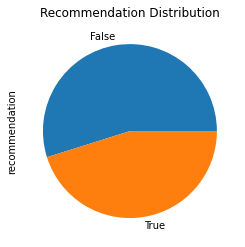

In [17]:
# Checking the recommendation distribution of recommended(True) and not recommended(False)

import matplotlib.pyplot as plt
all_reviews["recommendation"].value_counts().plot(
    kind = 'pie', 
    title = 'Recommendation Distribution'
)

In [19]:
# Convert final Dataframe to a CSV file
all_reviews.to_csv('/Users/katherinericaurte/Desktop/all_reviews.csv', index=False)

### **3.2 Feature Selection**

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

vect = TfidfVectorizer(stop_words = "english", analyzer="word", 
                       token_pattern=r'\b[a-zA-Z]{2,}\b', min_df=5)
vect.fit(all_reviews["review"].values)
bag_of_words = vect.transform(all_reviews["review"].values)

feature_names = vect.get_feature_names()
allreviews_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
allreviews_df["review"] = all_reviews["review"].values
allreviews_df.set_index("review", inplace=True)

allreviews_df

,aaa,abandoned,abilities,ability,able,absolute,absolutely,abstract,absurd,abysmal,...,yellow,yes,youtu,youtube,zero,zombie,zombies,zone,zones,zoom
review,,,,,,,,,,,,,,,,,,,,,
DONT BUY\n\ndiscontinued service for the game. no support and no games but with bots.,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
"When this game first released without the Warzone moniker, I gave it a bad review. I truly believed it was bad. Now, I played this game for nearly 60 hours while practicing for Star Wars Squadrons, and at even though it's basically a dead game, it's a pretty fun game, and at least it runs smoothly in VR. \n\nUNLIKE SQUADRONS WITH THEIR DOGSH!T SHIP TURNING ANIMATIONS CAPPED AT 60FPS. \n\nAnyhow, I wanted to say sorry to the devs of this game for taking a fat dump on it when it came out, it's actually pretty fun. \n",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
"ATTN newcomers: THIS is why early purchasers are SO UPSET\n\nI'm one of the most critical here on the Steam forums of Justin Pappas. That's because I know the full history of how the many postponed promised release dates went down. You newcomers don't even know since your wait has just begun (and will continue for years, I assure you). \n\nNormally, I understand when progress gets pushed back...BUT the developer has to handle it with honesty and integrity. Even though I've waited months/years for new episodes of Kentucky Route 0 and Sally Face (to name a couple of examples) I am not ticked with those devs; in fact, I have the utmost respect. Why? What's different about them vs. Justin Pappas? They have always been honest and up front. Justin, on the other hand, has not, and here is a quick breakdown.\n\nIn case you were unaware, back in 2015 there were date-specific release dates for EACH episode. Now we know that those Eps. were not even started on, nor did he have the budget to even begin to think about starting them. We would NOT have bought the Season Pass had we known Justin had no intention of releasing the Eps by the date advertised. BTW Episode 3 (that's right, 3, not 2) was first advertised to be released sometime in Q1 of 2016 (!!!). I forget the exact date...but it was set to a specific date (in early March 2016 if memory serves). Ep. 2 (which in hindsight has every indication of being abandoned since Q4 of 2017, see link below) was first advertised to drop during Q4 of 2015 (again, I don't remember the specific day). THAT'S why we purchased the Season Pass, because we were told the Eps. would be dropping within a couple months of each other. \n\nAgain, there were no TBDs back then but SPECIFIC DATES (repeating myself for emphasis here)! Justin knew full well Eps 2 and 3 weren't going to happen from the start, yet to this day he still sells the Season Pass. How is that even legal? To answer me own question...it's not, but difficult to prove since excuses are constantly being made (which change all the time) and Justin has attempted to cover it up. Just look at our old comments from 2015-2017 in the forums though and you'll see just how full of shit Justin actually is.\n\nTHEN to top if off, after the release date for Ep. 2 got pushed back many months, the 2016 release date came and went with NO new episode and not a word from Justin until WEEKS later!! He had totally forgotten that his own game even existed because he had already taken our money and ran at that point.\n\nForget about Steam refunds, which will obviously never happen; Justin owes us out of his own pocket...it's simply the right thing to do at this point. We know now though that he don't give a rat's♥♥♥♥♥about doing the right thing.",0.0,0.064929,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
"A sublime mix of influences seeming to comprise Pink Floyd, Guillermo Del Toro and Terry Gillian, Albino Lullaby:Episode 1 manage

In [21]:
# array of all reviews text in dataframe
all_reviews["review"].values

array(['DONT BUY\n\ndiscontinued service for the game. no support and no games but with bots.',
       "When this game first released without the Warzone moniker, I gave it a bad review. I truly believed it was bad. Now, I played this game for nearly 60 hours while practicing for Star Wars Squadrons, and at even though it's basically a dead game, it's a pretty fun game, and at least it runs smoothly in VR. \n\nUNLIKE SQUADRONS WITH THEIR DOGSH!T SHIP TURNING ANIMATIONS CAPPED AT 60FPS. \n\nAnyhow, I wanted to say sorry to the devs of this game for taking a fat dump on it when it came out, it's actually pretty fun. \n",
       "ATTN newcomers: THIS is why early purchasers are SO UPSET\n\nI'm one of the most critical here on the Steam forums of Justin Pappas. That's because I know the full history of how the many postponed promised release dates went down. You newcomers don't even know since your wait has just begun (and will continue for years, I assure you). \n\nNormally, I understand 

### **Exploring Three Models**

In [22]:
# Setting feature and target variables

features = all_reviews["review"]
target = all_reviews["recommendation"]

In [23]:
# Testing Naive Bayes, Logistic Regression, and Decision Tree models to see which model has the highest accuracy rate

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# split data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=5, ngram_range=(1,3)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

# Regression estimators to be evaluated
estimators = {
    'Logistic Regression': LogisticRegression(), 
    'Multinomial NB': MultinomialNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()}
  
def use_regressors(X_train_vectorized, X_test_vectorized, y_train, y_test):
      for estimator in estimators:
        regressor = estimators[estimator]
        model = regressor.fit(X=X_train_vectorized, y=y_train)
        print(estimator + ":")
        print("\tAccuracy for training set: ", model.score(X_train_vectorized, y_train))
        print("\tAccuracy for testing set: ", model.score(X_test_vectorized, y_test))

use_regressors(X_train_vectorized, X_test_vectorized, y_train, y_test)

Logistic Regression:
	Accuracy for training set:  0.9223350253807107
	Accuracy for testing set:  0.8356164383561644
Multinomial NB:
	Accuracy for training set:  0.8954314720812183
	Accuracy for testing set:  0.7960426179604262
Decision Tree Classifier:
	Accuracy for training set:  0.9923857868020305
	Accuracy for testing set:  0.7047184170471842


### **Hyperparameter Tuning Logistic Regression Model**

In [24]:
# Logistic Regression with vectorization paramaters
# stop words, stripping accents, and only using english-recognized words
# these paramaters will not be changed moving forward

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)


#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b').fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = LogisticRegression().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9441624365482234
Classification accuracy on testing set:  0.832572298325723
Number of features used:  9429


In [25]:
# Second attempt
# include min_df of 2

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = LogisticRegression().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9345177664974619
Classification accuracy on testing set:  0.8264840182648402
Number of features used:  4762


In [26]:
# Third attempt
# include min_df of 5

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=5).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = LogisticRegression().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.915228426395939
Classification accuracy on testing set:  0.817351598173516
Number of features used:  2148


**Since min_df of 5 decreased the accuracy rate from 0.826 to 0.817, I will continue with a min_df of 2 and test out ngram ranges.**

In [29]:
# Fourth attempt
# Adding ngrams - unigrams and bigrams

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = LogisticRegression().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9487309644670051
Classification accuracy on testing set:  0.832572298325723
Number of features used:  11730


**This increased the model accuracy from 0.826 to 0.832. I will proceed to try trigrams.**

In [28]:
# Fifth attempt
# Trying unigrams and trigrams

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,3)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = LogisticRegression().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9522842639593908
Classification accuracy on testing set:  0.8295281582952816
Number of features used:  15238


**The best parameters are min_df=2 and ngram_range=(1,2). I will proceed to hypertune the Logistic Regression model with these parameters.**

In [47]:
param_grid = {'C':[.001, .01, .1, 1, 10, 100]}


In [48]:
# using final parameters to hypertune Logistic Regression model

from sklearn.model_selection import GridSearchCV

# declaring the Grid Search object for Ridge regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# fitting the Grid Search object to the X_train_scaled and y_train data
grid_search.fit(X=X_train_vectorized, y=y_train)

#this is the best performance during training
print('Logistic Regression:')

# printing the best cross-validation score
print("\tBest cross-validation score: ", grid_search.best_score_)

# printing the best parameters for the Ridge regression

# printing the test set score 
print("\tTest set score: ", grid_search.score(X_test_vectorized, y_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
	Best cross-validation score:  0.8395939086294415
	Best parameters:  {'C': 10}
	Test set score:  0.837138508371385


In [126]:
# Final Logistic Regression Model and evaluation
from sklearn.metrics import confusion_matrix

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = LogisticRegression(C=10).fit(X=X_train_vectorized, y=y_train)


# Confusion Matrix

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

# define predicted and expected values
prediction = model.predict(X_test_vectorized)
expected = y_test

# create confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=prediction)

# Convert confusion matrix to a dataframe
confusion_df = pd.DataFrame(confusion, index=["Positive","Negative"],columns=["Positive", "Negative"])
print(confusion_df)

print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))

          Positive  Negative
Positive       312        46
Negative        57       242
Classification accuracy on training set:  0.9954314720812183
Classification accuracy on testing set:  0.8432267884322678


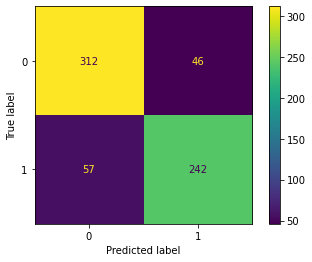

In [97]:
# Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

# defining the logistic regressor
clf = LogisticRegression(
    C = 10, 
    random_state = 3000, 
    max_iter = 100
)

# fitting model to training set
clf.fit(X_train_vectorized, y_train)

plot_confusion_matrix(clf, X_test_vectorized, y_test, include_values = True, values_format = 'd')

In [104]:
# looking at the probabilities of belonging to each case along with prediction made by model
proba = pd.DataFrame(model.predict_proba(X_test_vectorized), columns = ["Not Recommended", "Recommended"])
proba["prediction"] = model.predict(X_test_vectorized)
proba

,Not Recommended,Recommended,prediction
0,0.029473,0.970527,1
1,0.971972,0.028028,0
2,0.828345,0.171655,0
3,0.367953,0.632047,1
4,0.068270,0.931730,1
...,...,...,...
652,0.758165,0.241835,0
653,0.853793,0.146207,0
654,0.024378,0.975622,1
655,0.950554,0.049446,0


In [123]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train_vectorized, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.86294416 0.84771574 0.85279188 0.84771574 0.82233503 0.87817259
 0.86294416 0.82741117 0.82741117 0.81725888]


### **Hyperparameter Tuning Multinomial Naive Bayes Model**

In [38]:
# Multinomial NB with vectorization paramaters
# stop words, stripping accents, and only using english-recognized words
# these paramaters will not be changed moving forward

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)


#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b').fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = MultinomialNB().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9005076142131979
Classification accuracy on testing set:  0.7503805175038052
Number of features used:  9429


In [39]:
# Second attempt with Multinomial NB
# include min_df of 2

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = MultinomialNB().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9081218274111675
Classification accuracy on testing set:  0.7823439878234398
Number of features used:  4762


In [40]:
# Third attempt with Multinomial NB
# include min_df of 3

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=3).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = MultinomialNB().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9060913705583756
Classification accuracy on testing set:  0.7929984779299848
Number of features used:  3309


**The accuracy rate has decreased when min_df goes above 2. We will proceed with a min_df of 2.** 

In [41]:
# Fourth attempt with Multinomial NB
# Adding ngrams - unigrams and bigrams

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = MultinomialNB().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9248730964467005
Classification accuracy on testing set:  0.7777777777777778
Number of features used:  11730


In [42]:
# Fifth attempt with Multinomial NB
# Trying unigrams and trigrams

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,3)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = MultinomialNB().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9248730964467005
Classification accuracy on testing set:  0.7747336377473364
Number of features used:  15238


**The uni/bigram parameter has increased the accuracy rate the most. Therefore we will hypertune with these optimized vectorization parameters.**

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[.001, .01, .1, 1, 10, 100]}

# declaring the Grid Search object for Ridge regression
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)

# fitting the Grid Search object to the X_train_scaled and y_train data
grid_search.fit(X=X_train_vectorized, y=y_train)

#this is the best performance during training
print('Multinomial Naive Bayes:')

# printing the best cross-validation score
print("\tBest cross-validation score: ", grid_search.best_score_)

# printing the best parameters for the Ridge regression
print("\tBest parameters: ", grid_search.best_params_)

# printing the test set score 
print("\tTest set score: ", grid_search.score(X_test_vectorized, y_test))

Multinomial Naive Bayes:
	Best cross-validation score:  0.8248730964467004
	Best parameters:  {'alpha': 0.1}
	Test set score:  0.8249619482496194


In [125]:
# Final Multinomial NB model and evaluation

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = MultinomialNB(alpha=0.1).fit(X=X_train_vectorized, y=y_train)

# Confusion Matrix

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

# define predicted and expected values
prediction = model.predict(X_test_vectorized)
expected = y_test

# create confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=prediction)

# Convert confusion matrix to a dataframe
confusion_df = pd.DataFrame(confusion, index=["Positive","Negative"],columns=["Positive", "Negative"])
print(confusion_df)

print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))

          Positive  Negative
Positive       326        32
Negative        84       215
Classification accuracy on training set:  0.9649746192893401
Classification accuracy on testing set:  0.8234398782343988


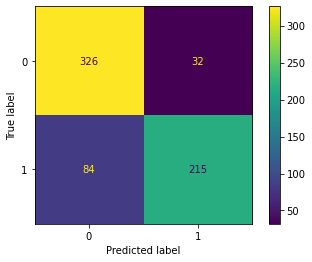

In [118]:
# Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

# defining the classifier
clf = MultinomialNB(
    alpha = 0.1
)

# fitting model to training set
clf.fit(X_train_vectorized, y_train)

plot_confusion_matrix(clf, X_test_vectorized, y_test, include_values = True, values_format = 'd')

In [87]:
# looking at the probabilities of belonging to each case along with prediction made by model
proba = pd.DataFrame(model.predict_proba(X_test_vectorized), columns = ["Not Recommended", "Recommended"])
proba["prediction"] = model.predict(X_test_vectorized)
proba

,Not Recommended,Recommended,prediction
0,0.201019,0.798981,1
1,0.978916,0.021084,0
2,0.955992,0.044008,0
3,0.204005,0.795995,1
4,0.006000,0.994000,1
...,...,...,...
652,0.907332,0.092668,0
653,0.914990,0.085010,0
654,0.011280,0.988720,1
655,0.987132,0.012868,0


In [122]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(MultinomialNB(), X_train_vectorized, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.79187817 0.82233503 0.85279188 0.81725888 0.75634518 0.84263959
 0.82741117 0.78172589 0.8071066  0.80203046]


### **Hyperparameter Tuning Decision Tree Classifier**

In [44]:
# Decision Tree Classifer with vectorization paramaters
# stop words, stripping accents, and only using english-recognized words
# these paramaters will not be changed moving forward

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)


#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b').fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = DecisionTreeClassifier().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9979695431472081
Classification accuracy on testing set:  0.7214611872146118
Number of features used:  9429


In [45]:
# Second attempt with Decision Tree Classifier
# include min_df of 2

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = DecisionTreeClassifier().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9954314720812183
Classification accuracy on testing set:  0.7229832572298326
Number of features used:  4762


In [75]:
# Third attempt with Decision Tree Classifier
# include min_df of 5

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=5).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = DecisionTreeClassifier().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9923857868020305
Classification accuracy on testing set:  0.730593607305936
Number of features used:  2148


**Proceeding with a min_df of 5.**

In [76]:
# Fourth attempt with Decision Tree Classifier
# Adding ngrams - unigrams and bigrams

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=5, ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = DecisionTreeClassifier().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9923857868020305
Classification accuracy on testing set:  0.7123287671232876
Number of features used:  2816


In [77]:
# Fifth attempt with Decision Tree Classifier
# Trying unigrams and trigrams

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,3)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = DecisionTreeClassifier().fit(X=X_train_vectorized, y=y_train)


print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))
print("Number of features used: ", len(vect.get_feature_names()))

Classification accuracy on training set:  0.9954314720812183
Classification accuracy on testing set:  0.6940639269406392
Number of features used:  15238


**Proceeding with uni/bigrams.**

**Hypertuning the Decision Tree Classifer with optimized vectorization parameters**

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[0.1, 1, 5, 10, 100, 200]}

# declaring the Grid Search object for Ridge regression
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# fitting the Grid Search object to the X_train_scaled and y_train data
grid_search.fit(X=X_train_vectorized, y=y_train)

#this is the best performance during training
print('Decision Tree Classifier:')

# printing the best cross-validation score
print("\tBest cross-validation score: ", grid_search.best_score_)

# printing the best parameters for the Ridge regression
print("\tBest parameters: ", grid_search.best_params_)

# printing the test set score 
print("\tTest set score: ", grid_search.score(X_test_vectorized, y_test))

Decision Tree Classifier:
	Best cross-validation score:  0.7172588832487309
	Best parameters:  {'max_depth': 100}
	Test set score:  0.7199391171993912


In [124]:
# Final Decision Tree Classifier model and evaluation

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=5, ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = DecisionTreeClassifier(max_depth=100).fit(X=X_train_vectorized, y=y_train)

# Confusion Matrix

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

# define predicted and expected values
prediction = model.predict(X_test_vectorized)
expected = y_test

# create confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=prediction)

# Convert confusion matrix to a dataframe
confusion_df = pd.DataFrame(confusion, index=["Positive","Negative"],columns=["Positive", "Negative"])
print(confusion_df)

print("Classification accuracy on training set: ", model.score(X_train_vectorized, y_train))
print("Classification accuracy on testing set: ", model.score(X_test_vectorized, y_test))

          Positive  Negative
Positive       259        99
Negative        84       215
Classification accuracy on training set:  0.9923857868020305
Classification accuracy on testing set:  0.7214611872146118


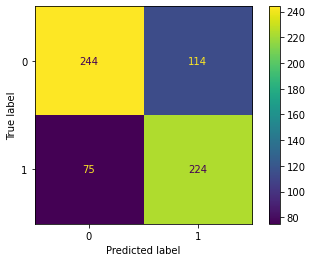

In [116]:
# Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

# defining the classifier
clf = DecisionTreeClassifier(
    max_depth = 100
)

# fitting model to training set
clf.fit(X_train_vectorized, y_train)

plot_confusion_matrix(clf, X_test_vectorized, y_test, include_values = True, values_format = 'd')

In [94]:
# looking at the probabilities of belonging to each case along with prediction made by model
proba = pd.DataFrame(model.predict_proba(X_test_vectorized), columns = ["Not Recommended", "Recommended"])
proba["prediction"] = model.predict(X_test_vectorized)
proba

,Not Recommended,Recommended,prediction
0,0.000000,1.000000,1
1,1.000000,0.000000,0
2,1.000000,0.000000,0
3,0.042553,0.957447,1
4,1.000000,0.000000,0
...,...,...,...
652,1.000000,0.000000,0
653,1.000000,0.000000,0
654,0.000000,1.000000,1
655,0.000000,1.000000,1


In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(), X_train_vectorized, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.6751269  0.74619289 0.74111675 0.74111675 0.68020305 0.7715736
 0.76142132 0.71573604 0.73096447 0.68527919]


## **4. Results**


Once the three models were hypertuned and optimized, the accuracy results were as follows:

Logistic Regression: 0.84  

Multinomial NB: 0.82


Decision Tree Classifier: 0.72

### **4.1 Final Model Evaluation**




In [132]:
# Classification Report on highest performing model: Logistic Regression 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve, plot_confusion_matrix

#create the vocabulary based on the training data
vect = TfidfVectorizer(stop_words = "english", strip_accents = "unicode",
                        analyzer="word", token_pattern=r'\b[a-zA-Z]{2,}\b',min_df=2, ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

#train the classifier
model = LogisticRegression(C=1).fit(X=X_train_vectorized, y=y_train)

# Confusion Matrix

#encode the words in X_train and X_test based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

# classification report
classification_report = {
    'accuracy': accuracy_score(y_test, prediction),
    'precision_score': precision_score(y_test, prediction),
    'recall_score': recall_score(y_test, prediction),
    'f1_score': f1_score(y_test, prediction),
    'roc_auc_score': roc_auc_score(y_test, prediction)
}

df_classification = pd.DataFrame(classification_report.items())
df_classification.columns = ['Metrics', 'Values']
print(df_classification)


           Metrics    Values
0         accuracy  0.843227
1  precision_score  0.840278
2     recall_score  0.809365
3         f1_score  0.824532
4    roc_auc_score  0.840436


### **How did the models perform?**


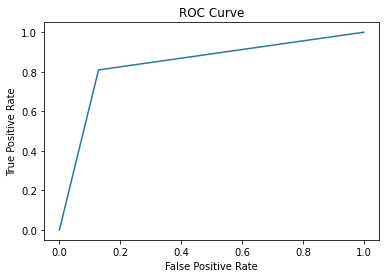

In [133]:
# ROC Curve for 
fpr, tpr, _ = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

In [134]:
print ("The area under the ROC curve (AUC) is \t {:.3f}".format(roc_auc_score(y_test, prediction)))

The area under the ROC curve (AUC) is 	 0.840


### Data Exploration

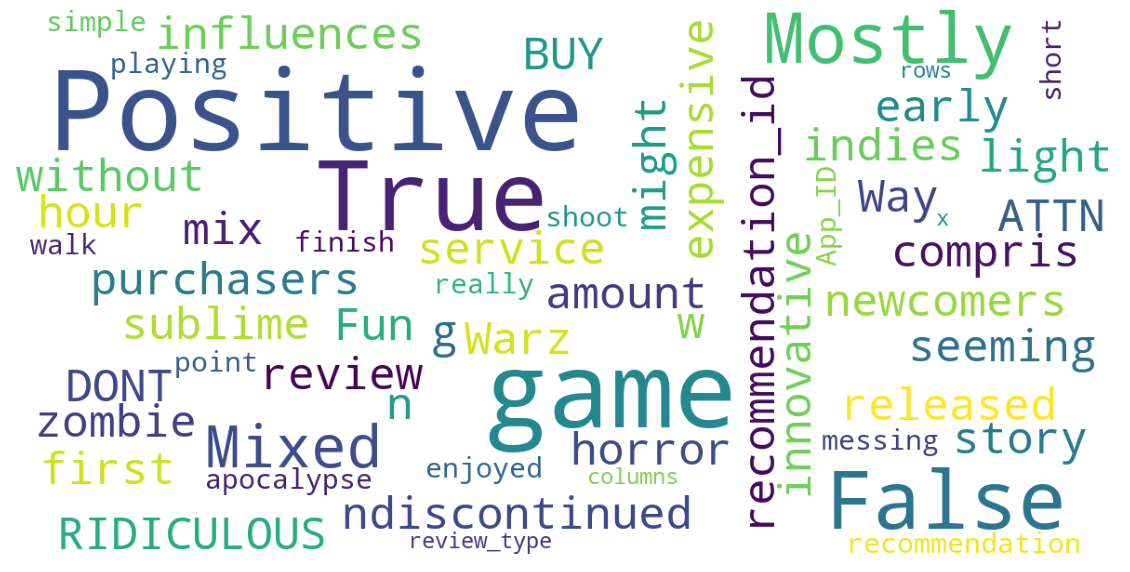

In [138]:
# word cloud of only positive reviews (vectorized)

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wrd_cloud(data):
    wordcloud = WordCloud(
        background_color="white",
        stopwords = STOPWORDS,
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(df))
    
    fig = plt.figure(1,figsize=(20,20))
    plt.axis("off")
    
    plt.imshow(wordcloud)
    plt.show()

wrd_cloud(positive_df)

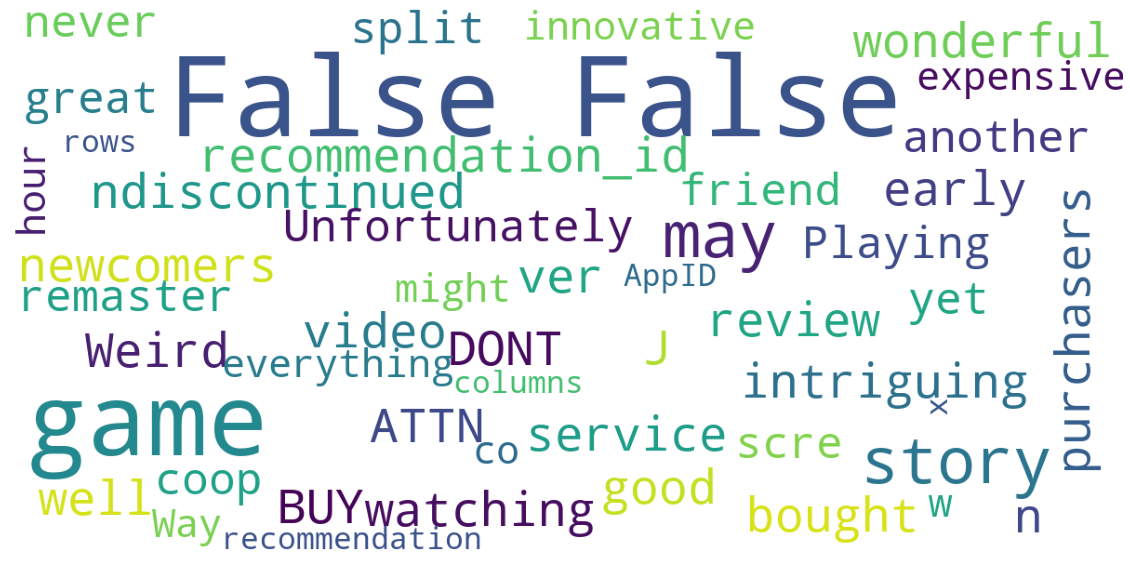

In [137]:
# word cloud of only negative reviews (vectorized)

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wrd_cloud(data):
    wordcloud = WordCloud(
        background_color="white",
        stopwords = STOPWORDS,
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(df2))
    
    fig = plt.figure(1,figsize=(20,20))
    plt.axis("off")
    
    plt.imshow(wordcloud)
    plt.show()

wrd_cloud(negative_df)